$$\LARGE
\underline
{
\textbf
    {Problema 3}
}
$$

Considere una barra con una carga axial aplicada de $T= -20 N/cm^{2}$, como se muestra en la figura.
Determine el desplazamiento axial y la tensión. Tome $E = 210\ GPa$, $A = 10\ cm^{2}$ y $L= 1.50\ m$. Use primero uno y luego dos elementos. Intente generalizarlo a $n$ elementos y compare sus resultados
con la solución teórica:

$$ \large
d(x)=\frac{|T|}{6 AE}(x^{3}-L^{3})\ ;\ \sigma (x)= \frac{|T|}{2A}x^{2}
$$

<center><img src="ImgProb03G02.png"></center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import MEF as mef

In [2]:
A = 10/(100**2)  # m2
E = 210e9/(100**2)   # N/m2
C = -20
L = 150/100  # m
glxn = 1  # grados de libertad por nodo

In [3]:
# soluciones teóricas
def d_x(x):
    d = abs(-20)/(6*A*E)*(x**3-L**3)
    return d

def sig_x(x):
    sig = abs(-20)/(2*A)*x**2
    return sig

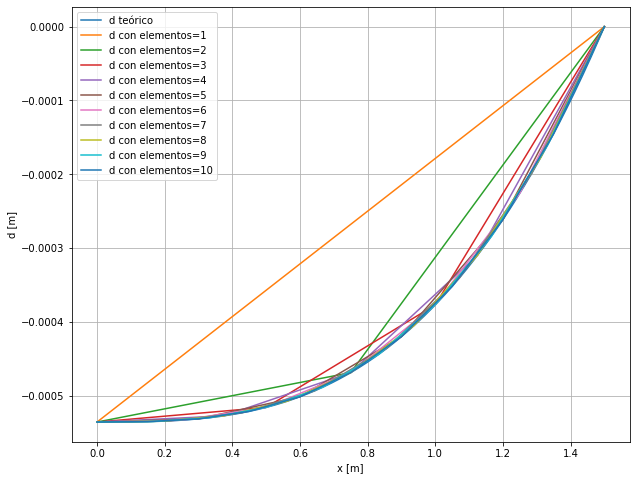

In [4]:
fig, ax = plt.subplots(figsize=(10,8))
x_teo = np.linspace(0,L,500)
plt.plot(x_teo,d_x(x_teo),label='d teórico')

for barras in range(1,11):
    # utilizo la función creada para este ejercicio
    f, d, Rx, sig, Kglobal = mef.dist_uniforme_barra(A, E, C, L, barras)
    x_exp = np.linspace(0,L,barras+1)
    plt.plot(x_exp,d,label=f'd con elementos={barras}')
plt.ylabel('d [m]')
plt.xlabel('x [m]')
plt.legend()
plt.grid('on')

In [5]:
barras = 3
f, d, Fr, sig, Kglobal = mef.dist_uniforme_barra(A, E, C, L, barras)

sig_nodo = matriz que será para graficar las tensiones en cada nodo

Las tensiones son constantes dentro de cada partición del elemento, por lo que al alcanzar un nodo su valor cambiara de golpe, es decir, en los nodos que no estan en los extremos deben haber 2 valores de tensiones, ya que ese nodo esta compartido por dos elementos.

In [6]:
MN = np.zeros([barras+1]).reshape([-1,1])
sum = 0
for i in range(barras+1):
    MN[i] = sum
    sum += L/barras

In [7]:
sig_nodo = np.zeros([(barras+1)*2-2,2])
for i in range(barras):
    sig_nodo[i*2,0] = sig[i]
    sig_nodo[i*2+1,0] = sig[i]
    sig_nodo[i*2,1] = MN[i]
    sig_nodo[i*2+1,1] = MN[i+1]

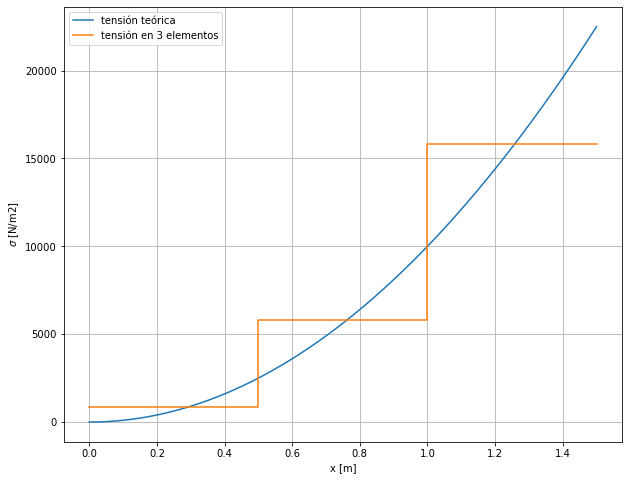

In [8]:
fig, ax = plt.subplots(figsize=(10,8))
plt.plot(x_teo,sig_x(x_teo),label='tensión teórica')
plt.plot(sig_nodo[:,1],sig_nodo[:,0],label=f'tensión en {barras} elementos')

plt.ylabel('$\sigma$ [N/m2]')
plt.xlabel('x [m]')
plt.legend()
plt.grid('on')